<a href="https://colab.research.google.com/github/brzenio/R_study/blob/main/R2022_Drugi_termin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadanie 1:

0) W zadaniu prosze wykorzystac nastepujacy wektor:

    c("Data: 01/25/2022, 12:10:44, kod pocztowy: 02-787, ulica: 'Zamiany', Pracownik: Jan Kowalski",
    "Data: 01/26/2022, 14:10:44, kod pocztowy: 02-776, ulica: 'Nowoursynowska', Pracownik: Kowalewska Aneta",
    "Data: 01/27/2022, 15:10:44, kod pocztowy: 02 759, ulica: 'Arbuzowa', Pracownik: Rafal Kowalczyk")

a) Zastap caly kod pocztowy wielka litera X.

b) Zastap nazwe ulicy wyrazeniem RODO.

c) Znajd elementy wektora, w ktorych nazwisko zawiera "Kow" oraz nazwisko nie jest koncem tekstu.

d) Przetworz zawarta w wektozre date na obiekt typu czas.

In [2]:
vector <- c("Data: 01/25/2022, 12:10:44, kod pocztowy: 02-787, ulica: 'Zamiany', Pracownik: Jan Kowalski",
"Data: 01/26/2022, 14:10:44, kod pocztowy: 02-776, ulica: 'Nowoursynowska', Pracownik: Kowalewska Aneta",
"Data: 01/27/2022, 15:10:44, kod pocztowy: 02 759, ulica: 'Arbuzowa', Pracownik: Rafal Kowalczyk")

vector <- gsub("kod pocztowy: [0-9]+", "kod pocztowy: X", vector)

vector <- gsub("ulica: '[a-zA-Z]+'", "ulica: 'RODO'", vector)

result <- vector[grep("Pracownik: [A-Za-z]+ Kow", vector) & !grepl("Pracownik: [A-Za-z]+ Kow$", vector)]

vector_time <- as.POSIXct(gsub("Data: ", "", vector), format = "%m/%d/%Y, %H:%M:%S")
vector_time

Warning message in grep("Pracownik: [A-Za-z]+ Kow", vector) & !grepl("Pracownik: [A-Za-z]+ Kow$", :
“longer object length is not a multiple of shorter object length”


[1] "2022-01-25 12:10:44 UTC" "2022-01-26 14:10:44 UTC"
[3] "2022-01-27 15:10:44 UTC"

Zadanie 2:

a) Wczytaj dwa pliki z kolumnowe "Zadanie_2a.txt" oraz "Zadanie_2b.txt".

b) Dokonaj zlaczenia tabel z pkt a) poprzez klucze podstawowe "klucz" oraz "key".
Tabela wynikowa powinna zawierac wszystkie wiersze z obydwu plikow (suma zbiorow).

c) Posortuj tabele wynikowa z pkt b) wzgledem klucza podstawowego malejaco.

d) Nie wykorzystujac petli, zastap braki danych w tabeli z pkt c) liczba 666.

In [ ]:
file1 <- read.table("Zadanie_2a.txt", header = TRUE, sep = ",")
file2 <- read.table("Zadanie_2b.txt", header = TRUE, sep = ",")

merged_table <- merge(file1, file2, by.x = "klucz", by.y = "key", all = TRUE)

sorted_table <- merged_table[order(merged_table$klucz, decreasing = TRUE),]

sorted_table[is.na(sorted_table)] <- 666

Zadanie 3:

a) Stworz wektor liczb od 1 do 1003 dodajac do niego wartosci losowe z rozkladu normalnego o sredniej 100 oraz o odchyleniu standardowym 10.

b) Podziel powyzszy szereg na 6 rownych odcinkow.

c) Stworz za pomoca petli for iterujacej w ramach wektora z pkt b) 6 wykresow liniowy stworzonych w jednym okienku podzielonym na 6 obszarow.

d) Kazdy wykres stworzony jest na podstawie odcinkow z pkt b) oraz pkt a).

e) Tytul wykresu powinien zmieniac sie dynamicznie od "Wykres_1" do "Wykres_6". Nazwa osi pionowej to "Szereg".

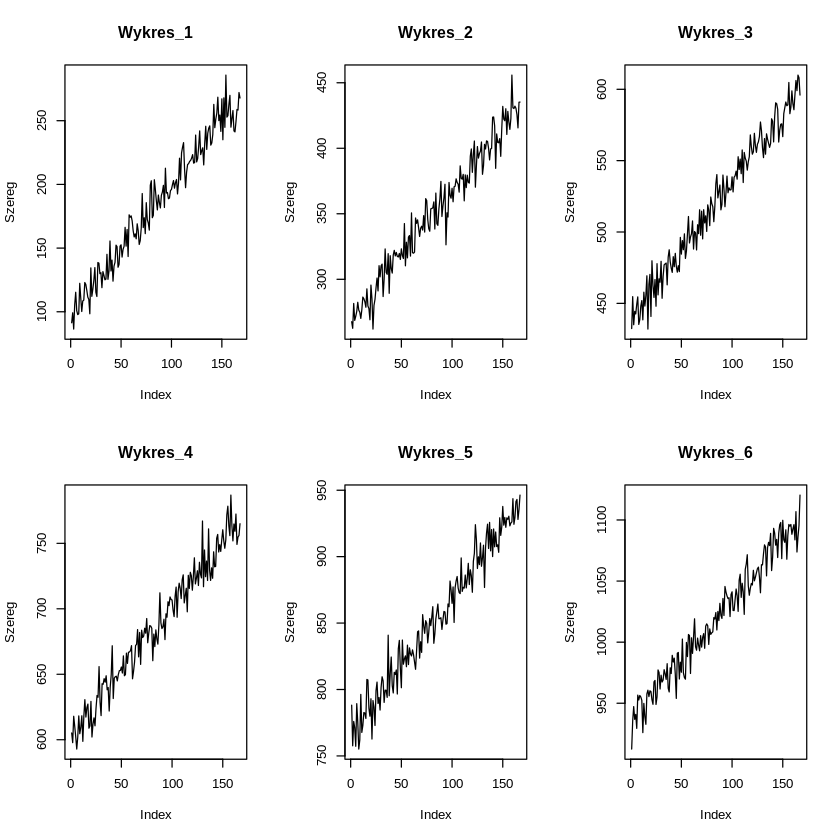

In [3]:
set.seed(444)
vec <- 1:1003 + rnorm(1003, mean=100, sd=10)

splits <- split(vec, cut(seq_along(vec), 6, labels = paste0("Wykres_", 1:6)))

par(mfrow = c(2,3))
for (i in 1:6) {
  plot(splits[[i]], type = "l", main = paste0("Wykres_", i), xlab = "Index", ylab = "Szereg")
}

Zadania 4:

a) Stworz 5-elementowa lista. Kazdy z wektorow zawiera 10 wartosci wylosowanych z rozkladu rownomiernego (nie uzywajac petli).

b) Przeksztalc liste z pkt a) na macierz o wymiarach "10x5", poprzez polaczenie kazdego wektora kolumnowo.

c) Nie uzywajac petli, przetestuj wszystkie wartosci w tabeli z pkt. b) sprawdzajac czy sa one mniejsze lub rowne 0.5,
jezeli tak, to nowa wartosc wskazuje "mniej0.5", w przeciwnym wypadku "wiecej0.5".

d) Na podstawie wyniku z pkt c) nie wykorzystujac petli zlicz liczbe wystapien dwoch kategorii.

In [11]:
lista <- list(runif(10), runif(10), runif(10), runif(10), runif(10))

macierz <- t(do.call(cbind, lista))

macierz[macierz <= 0.5] <- "mniej0.5"
macierz[macierz > 0.5] <- "wiecej0.5"

tablica_wystapien <- table(macierz)

tablica_wystapien

macierz
wiecej0.5 
       50 